<h1> TED Talk Analysis - 2476 talks (1972-2017)</h1>

[TED Talk datset](https://data.world/owentemple/ted-talks-complete-list)

As Discussed please apply : https://ted2020.ted.com/idea-search

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # useful for many scientific computing in Python
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [86]:
df_TED = pd.read_csv('TED_Talks_by_ID_plus-transcripts.csv')

In [ ]:
df_TED = df_TED.pivot_table(df_TED,index='event',aggfunc={'id':'count'},dropna=True)
#df_TED=df_TED.id.value_counts().sort_index()
df_TED=df_TED.sort_values(by=['id'],ascending=False)
df_TED_HP = df_TED[0:25]

<h4> HeatMap of TED Talks based on event/Venue count </h4>

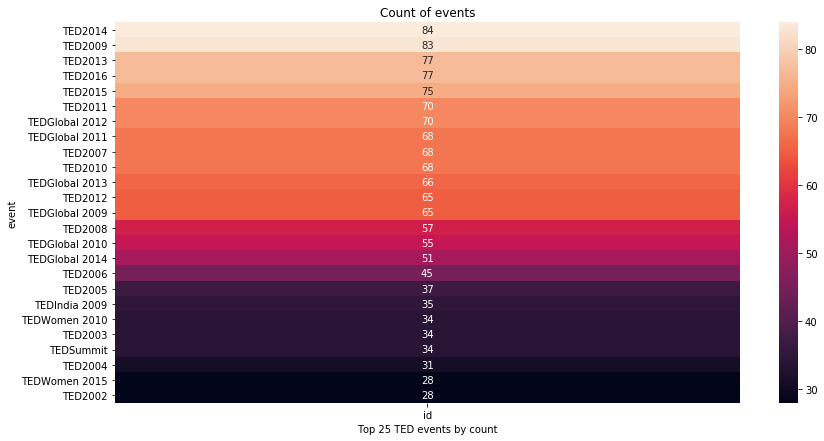

In [68]:
plt.figure(figsize=(14,7))

# Add title
plt.title("Count of events")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=df_TED_HP, annot=True)

# Add label for horizontal axis
plt.xlabel("Top 25 TED events by count")

Analysis is done based on the tags attached to all the talks in the TED.com website. Data with tags music, technology and 
fashion have been filtered out.

In [163]:
#df_TED = df_TED.groupby('event').count()
df_TED_music = pd.DataFrame()
df_TED_music['Tags'] = df_TED['tags']
df_TED_music['events'] = df_TED['event']
terms = ['music','technology','fashion']
df_TED_music=df_TED_music[df_TED_music['Tags'].str.contains('|'.join(terms))]
df_TED_music.head()

,Tags,events
0,"cars,alternative energy,culture,politics,scien...",TED2006
4,"cars,industrial design,transportation,inventio...",TED2002
5,"biotech,invention,oceans,genetics,DNA,biology,...",TEDGlobal 2005
6,"simplicity,computers,software,interface design...",TED2006
8,"robots,cars,industrial design,transportation,i...",TED2002


In [248]:
terms = ['music','technology','fashion']
df_TED_=df_TED[df_TED['tags'].str.contains('|'.join(terms))]
df_TED_.head()

,id,speaker,headline,URL,description,transcript_URL,month_filmed,year_filmed,event,duration,...,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
0,1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,0:16:17,...,0.04,0.00,0.0,0.48,0.00,0.22,0.0,0.00,0.00,0.22
4,5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,0:20:04,...,0.05,0.03,0.0,0.39,0.00,0.05,0.0,0.00,0.03,0.13
5,6,Craig Venter,Sampling the ocean's DNA,http://www.ted.com/talks/view/id/6,Genomics pioneer Craig Venter takes a break fr...,http://www.ted.com/talks/view/id/6/transcript?...,7,2005,TEDGlobal 2005,0:16:51,...,0.08,0.08,0.0,0.27,0.04,0.31,0.0,0.04,0.00,0.08
6,7,David Pogue,Simplicity sells,http://www.ted.com/talks/view/id/7,New York Times columnist David Pogue takes aim...,http://www.ted.com/talks/view/id/7/transcript?...,2,2006,TED2006,0:21:26,...,0.00,0.00,0.0,0.11,0.00,0.03,0.0,0.03,0.06,0.44
8,9,Dean Kamen,To invent is to give,http://www.ted.com/talks/view/id/9,Inventor Dean Kamen lays out his argument for ...,http://www.ted.com/talks/view/id/9/transcript?...,2,2002,TED2002,0:20:07,...,0.09,0.06,0.0,0.18,0.00,0.15,0.0,0.12,0.00,0.09


<h4> Introduction of TEDx Talks</h4>

Event types: Every TEDx event falls under one of these categories, and while all events follow a very similar format, some different content, rules and audiences apply to each type of event.

<h6> 1. Standard event </h6>

This event type is organized in the city or town in which you live, engages a wide range of local residents, and showcases a diverse array of talks, not limited to one subject. The event is named after the location-based community it serves. Learn more

<h6> 2. University event </h6>

Holding your event for your university? This event type is for those hosted at a college or university, and organized by current university administration staff, faculty or students. Learn more

<h6> 3. Youth event </h6>

This is a TEDx event organized by, or catered toward, youth and/or kids or school communities. Learn more

<h6> 4. ED event </h6>

ED events are TEDx events where educators, students, administrators and others gather to discuss the future of education. Learn more

<h6> 5. Salon event </h6>

This is a small weekly or monthly event that keeps a TEDx community engaged between regularly scheduled TEDx events. In order to organize a Salon event, applicants must already have an existing standard license. Learn more

<h6> 6. TEDxLive event </h6>

TEDxLive is centered around the simulcast of the annual TED Conference. Here, the world becomes TED’s audience. Learn more
TEDxWomen event

<h6> 7. TEDxWomen event </h6> 

TEDxWomen event is a TEDx event on the topic of women and gender which features the simulcast of TEDWomen. This event may only be organized around the official TEDWomen conference each year. Learn more

<h6> 8. Business event </h6>

TEDx Business events provide the framework for businesses to spark innovation and ignite conversations through private, staff-only events built on TED and TEDx’s winning formula of short, striking talks. Learn more

<h6> 9. Internal event </h6>

This is for nonprofit organizations, government entities and hospitals that want to organize an event under an institutional name. This event type, and the naming exception it grants, is approved only for internal, private, employees-only events.Learn more

<h6> 10. Library event </h6>

This event follows the same format as a standard event, except that it is hosted by librarians at a local library. Learn more

<h6> 11. Level 2</h6>

The TEDx Level 2 license is for organizers with at least two years in the program, and other requirements. Learn more

Further data has been filtered out for TEDx events and by location Boston, San Diego and New York

In [161]:
df_TEDx=df_TED_[df_TED_['event'].str.contains('x',regex=False)]
terms = ['New','ny','Boston','SanDiego']
df_TEDx_MFT=df_TEDx[df_TEDx['event'].str.contains('|'.join(terms))]
df_TED_MFT=df_TED_MFT.groupby('event').count()[['id']]
df_TED_MFT=df_TED_MFT.sort_values(by='id',ascending=False)
df_TED_MFT

,id
event,
TEDxBoston 2011,4
TEDxBoston 2012,2
TEDxBoston 2009,1
TEDxNewYork,1
TEDxSanDiego,1


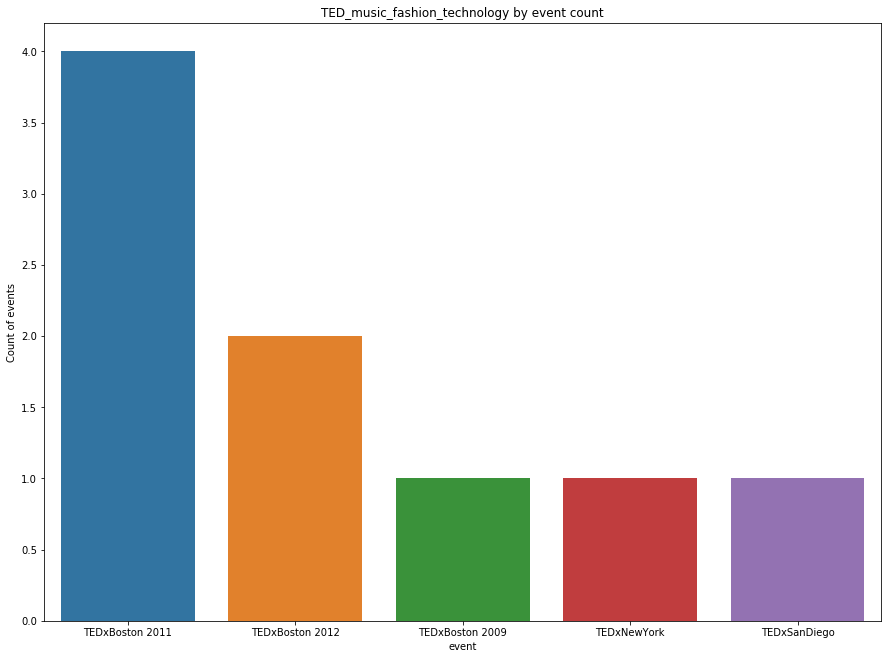

In [162]:
plt.figure(figsize=(15,11))

# Add title
plt.title("TED_music_fashion_technology by event count")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df_TED_MFT.index, y=df_TED_MFT['id'])

# Add label for vertical axis
plt.ylabel("Count of events")

<h4> Boston is the clear winner with highest number of TEDx events in music , technology and fashion </h4>

In [234]:
df_TEDxBoston = df_TED_[df_TED_['event'].str.contains('Boston',regex=False)]
df_TEDxBoston['transcript'].dropna()
df_TEDxBoston['transcript'].str.replace(r'\r','')


611     0:15The problem I want to talk with youabout i...
1015    0:12Ladies and gentlemen,I present to you the ...
1019    0:15Erez Lieberman Aiden: Everyone knowsthat a...
1106                                                  NaN
1128    0:11I want to talk to you about,or share with ...
1332    0:12I thought I would startwith a very brief h...
1347    0:11As it turns out, when tens of millionsof p...
Name: transcript, dtype: object

In [262]:
str1 = ''.join(str(df_TEDxBoston['transcript'].str.replace(r'\r',' ')))
str1

'611     0:15   The problem I want to talk with you abo...\n1015    0:12   Ladies and gentlemen, I present to you ...\n1019    0:15   Erez Lieberman Aiden: Everyone knows th...\n1106                                                  NaN\n1128    0:11   I want to talk to you about, or share w...\n1332    0:12   I thought I would start with a very bri...\n1347    0:11   As it turns out, when tens of millions ...\nName: transcript, dtype: object'

In [272]:
stopwords = set(STOPWORDS)
stopwords.update(['n','The','0','1','2','3','4','5','6','7','8','9','11','12','15','NaN','bri','th','dtype'])

In [273]:
mask = np.array(Image.open("TED.jpg"))
TEDx_Boston_wc = WordCloud(
    background_color='white',
    mode='RGBA',
    mask=mask,
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
TEDx_Boston_wc.generate(str1)

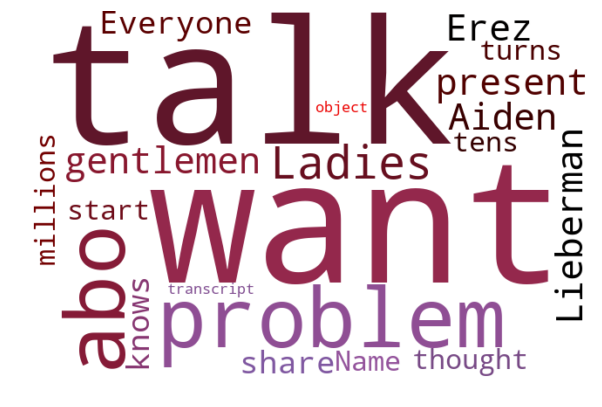

In [274]:
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,7])
plt.imshow(TEDx_Boston_wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

Generated a word cloud for talks in Boston but could not find any pattern will contunue my study based on your inputs

<br> Sincerely,</br>

Sriramya